**Importing Necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the data which is in csv form**

In [2]:
df = pd.read_csv('/kaggle/input/real-estate-data-sourced-from-99acres-com/flats.csv')
df

,property_name,link,society,price,rate,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
0,2 BHK Flat in Krishna Colony,https://www.99acres.com/2-bhk-bedroom-apartmen...,maa bhagwati residency,45 Lac,"₹ 5,000/sq.ft.",Carpet area: 900 (83.61 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ...",C68850746
1,2 BHK Flat in Ashok Vihar,https://www.99acres.com/2-bhk-bedroom-apartmen...,Apna Enclave,50 Lac,"₹ 7,692/sq.ft.",Carpet area: 650 (60.39 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ...",H68850564
2,2 BHK Flat in Sohna,https://www.99acres.com/2-bhk-bedroom-apartmen...,Tulsiani Easy in Homes,40 Lac,"₹ 6,722/sq.ft.",Carpet area: 595 (55.28 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,NaN,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ...",J68850120
3,2 BHK Flat in Sector 61 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,Smart World Orchard,1.47 Crore,"₹ 12,250/sq.ft.",Carpet area: 1200 (111.48 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,Study Room,"Sector 61 Gurgaon, Gurgaon, Haryana",2nd of 4 Floors,NaN,Dec-23,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN,S68849476
4,2 BHK Flat in Sector 92 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,Parkwood Westend,70 Lac,"₹ 5,204/sq.ft.",Super Built up area 1345(124.95 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,Study Room,"Sector 92 Gurgaon, Gurgaon, Haryana",5th of 8 Floors,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ...",L47956793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,3 BHK Flat in Sector 86 Gurgaon,https://www.99acres.com/3-bhk-bedroom-apartmen...,Ansal Heights 86,1.05 Crore,"₹ 5,541/sq.ft.",Super Built up area 1895(176.05 sq.m.),3 Bedrooms,3 Bathrooms,3 Balconies,Servant Room,"Tower C, Sector 86 Gurgaon, Gurgaon, Haryana",9th of 13 Floors,North-East,Under Construction,"['IRIS Broadway Mall', 'Delhi Jaipur Expresswa...",Residential apartment for sell.Located in sect...,[],NaN,"['Safety4.5 out of 5', 'Lifestyle5 out of 5', ...",D26586124
3013,5 BHK Flat in Sector 48 Gurgaon,https://www.99acres.com/5-bhk-bedroom-apartmen...,Parsvnath Green Ville3.9 ★,3.3 Crore,"₹ 9,984/sq.ft.",Super Built up area 3905(362.79 sq.m.)Built Up...,5 Bedrooms,5 Bathrooms,3+ Balconies,Servant Room,"Sector 48 Gurgaon, Gurgaon, Haryana",4th of 5 Floors,NaN,10+ Year Old,"['Sri Radhe Krishna Temple', 'Icici bank ATM',...",5 bhk duplex penthouse in low rise building.Av...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...","['Management4 out of 5', 'Green Area4 out of 5...",J17123294
3014,3 BHK Flat in Sector 108 Gurgaon,https://www.99acres.com/3-bhk-bedroom-apartmen...,Raheja Vedaanta3.6 ★,95 Lac,"₹ 5,214/sq.ft.",Super Built up area 1822(169.27 sq.m.),3 Bedrooms,3 Bathrooms,3 Balconies,Others,"Sector 108 Gurgaon, Gurgaon, Haryana",3rd o

**Exploring the dataset shapes and datatypes.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017 entries, 0 to 3016
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_name    3017 non-null   object
 1   link             3017 non-null   object
 2   society          3016 non-null   object
 3   price            3007 non-null   object
 4   rate             3004 non-null   object
 5   areaWithType     3008 non-null   object
 6   bedRoom          3008 non-null   object
 7   bathroom         3008 non-null   object
 8   balcony          3008 non-null   object
 9   additionalRoom   1694 non-null   object
 10  address          3002 non-null   object
 11  floorNum         3006 non-null   object
 12  facing           2127 non-null   object
 13  agePossession    3007 non-null   object
 14  nearbyLocations  2913 non-null   object
 15  description      3008 non-null   object
 16  furnishDetails   2203 non-null   object
 17  features         2594 non-null   

**Checking for the null values.**

In [4]:
# replacing "Price on Request" with 0 to convert price column in numeric format
df.loc[df['price']=='Price on Request','price'] = 0

# Remove non-numeriprice_numericc characters and convert prices to numeric
df['price'] = df['price'].replace({' Lac': '00000', ' Crore': '0000000', 'â‚¹ ': '', ',': ''}, regex=True).astype(float)

# Extract numeric part of the area
df['areaWithType'] = df['areaWithType'].str.extract(r'(\d+\.?\d*)').astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017 entries, 0 to 3016
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_name    3017 non-null   object 
 1   link             3017 non-null   object 
 2   society          3016 non-null   object 
 3   price            3007 non-null   float64
 4   rate             3004 non-null   object 
 5   areaWithType     3008 non-null   float64
 6   bedRoom          3008 non-null   object 
 7   bathroom         3008 non-null   object 
 8   balcony          3008 non-null   object 
 9   additionalRoom   1694 non-null   object 
 10  address          3002 non-null   object 
 11  floorNum         3006 non-null   object 
 12  facing           2127 non-null   object 
 13  agePossession    3007 non-null   object 
 14  nearbyLocations  2913 non-null   object 
 15  description      3008 non-null   object 
 16  furnishDetails   2203 non-null   object 
 17  features      

**Question 1: How many flats are listed in each society?**

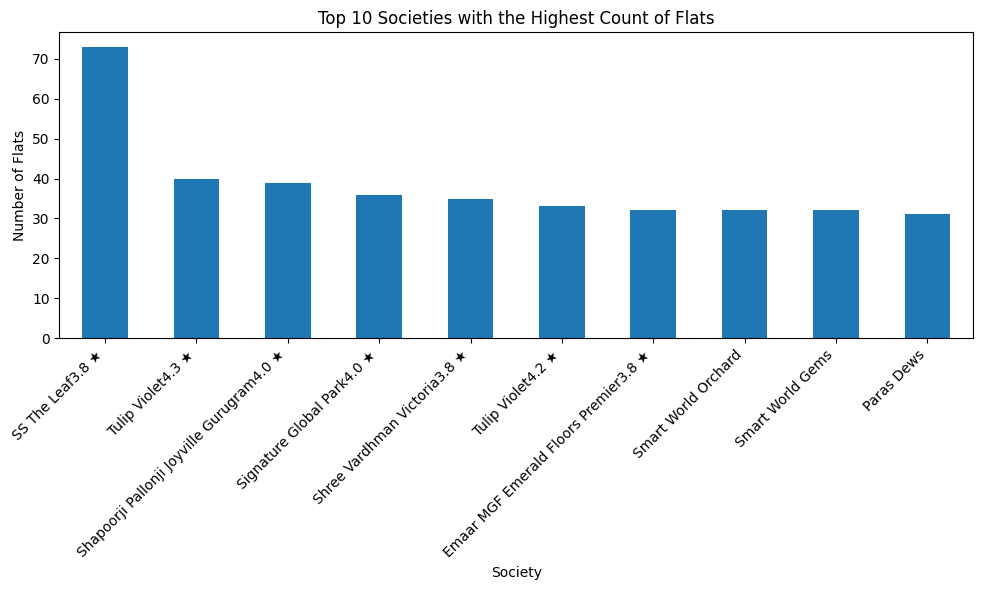

In [6]:
flats_per_society = df['society'].value_counts()

# Selecting top 10 societies
top_10_flats_per_society = flats_per_society.head(10)


# Plotting
plt.figure(figsize=(10, 6))
top_10_flats_per_society.plot(kind='bar')
plt.title('Top 10 Societies with the Highest Count of Flats')
plt.xlabel('Society')
plt.ylabel('Number of Flats')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**As per the above graph the society with the highest number of flats listed is "SS The Leaf3.8" with 73 flats and followed by "Tulip Violet4.3" with 40 flats.**

**Question 2: What is the average price of 2 BHK flats?**

In [7]:
# Filter for 2 BHK flats
two_bhk_flats = df[df['bedRoom'] == '2 Bedrooms']


# Calculate average price
average_price = two_bhk_flats['price'].mean()
print(average_price)

3696309.6348891235


**The average price of 2 BHK flats is approximately ₹36,96,309.63.**

**Question 3: Count the number of flats available in each bedroom category?**

bedRoom
3 Bedrooms    1439
2 Bedrooms     948
4 Bedrooms     481
1 Bedroom      105
5 Bedrooms      32
6 Bedrooms       3
Name: count, dtype: int64


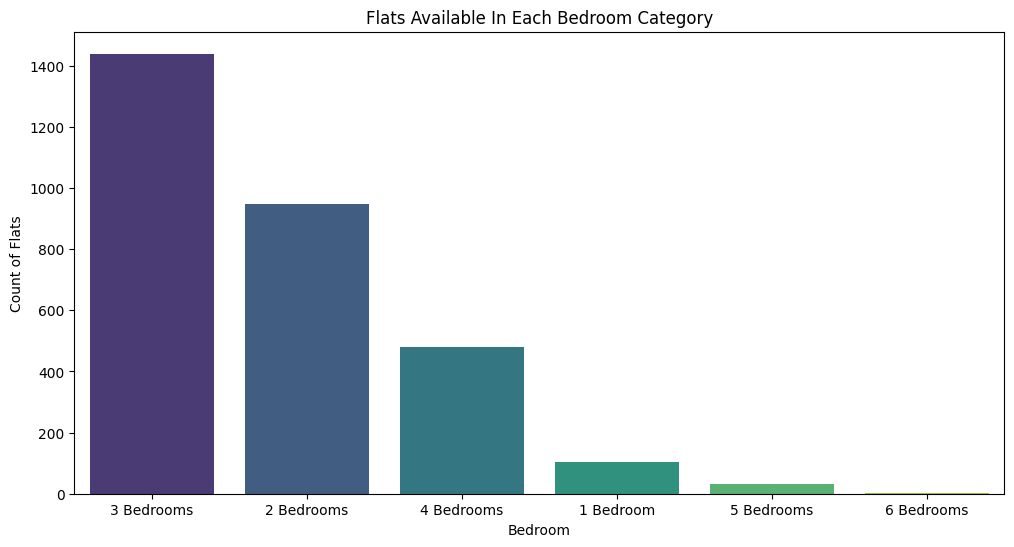

In [8]:
# Count flats in each bedroom category
flats_per_bedroom = df['bedRoom'].value_counts()
print(flats_per_bedroom)

plt.figure(figsize=(12,6))
sns.barplot(x = flats_per_bedroom.index, y = flats_per_bedroom.values, palette = 'viridis')
plt.title('Flats Available In Each Bedroom Category')
plt.xlabel('Bedroom')
plt.ylabel('Count of Flats')
plt.show()


**Question 4: What is the distribution of flats based on the number of bathrooms?**

bathroom
2 Bathrooms    1047
3 Bathrooms     991
4 Bathrooms     638
5 Bathrooms     170
1 Bathroom      115
6 Bathrooms      42
7 Bathrooms       5
Name: count, dtype: int64


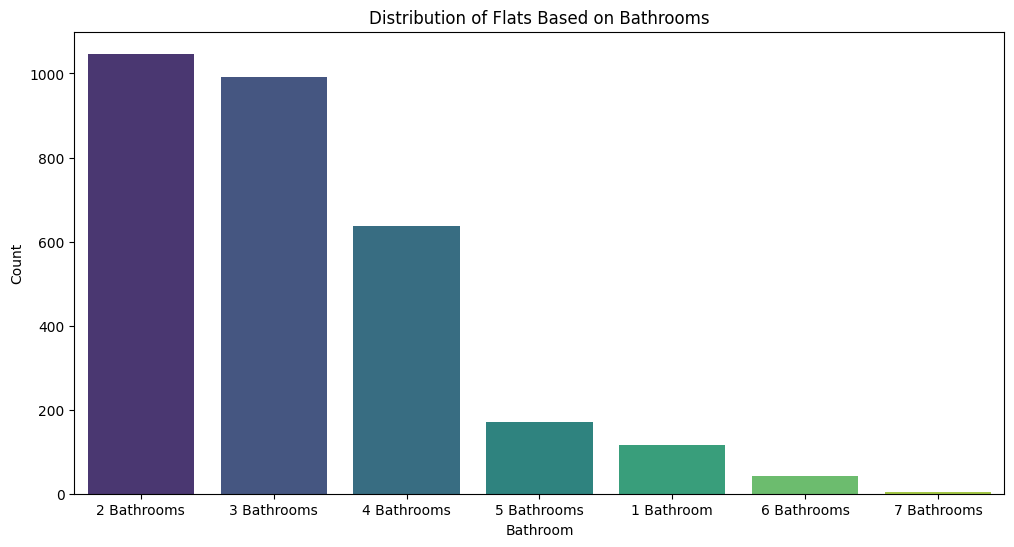

In [9]:
# Distribution of flats based on number of bathrooms
bathroom_distribution = df['bathroom'].value_counts()
print(bathroom_distribution)

plt.figure(figsize= (12,6))
sns.barplot(x = bathroom_distribution.index, y = bathroom_distribution.values, palette = 'viridis')
plt.title('Distribution of Flats Based on Bathrooms')
plt.xlabel('Bathroom')
plt.ylabel('Count')
plt.show()

**Question 5: Determine the average area of flats for each type of facing (e.g., North, South).**

facing
East          1930.989858
North         3931.697781
North-East    3162.792510
North-West    2413.443025
South         1921.257291
South-East    2025.120000
South-West    6500.352074
West          1870.265464
Name: areaWithType, dtype: float64


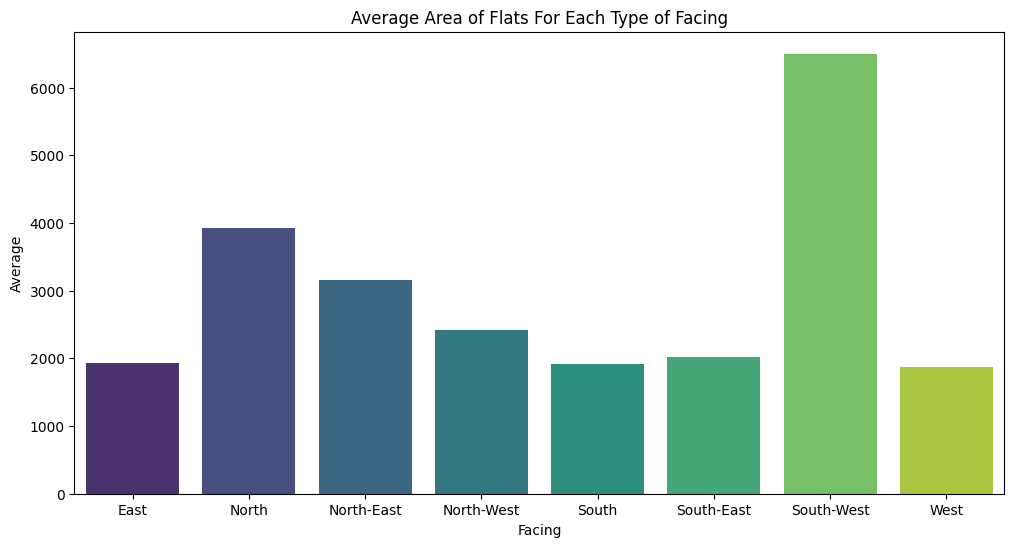

In [10]:
# Calculate average area for each facing type
average_area_facing = df.groupby('facing')['areaWithType'].mean()
print(average_area_facing)

plt.figure(figsize=(12, 6))
sns.barplot(x = average_area_facing.index, y = average_area_facing.values, palette='viridis' )
plt.title('Average Area of Flats For Each Type of Facing')
plt.xlabel('Facing')
plt.ylabel('Average')
plt.show()

**Question 6: Analyze the correlation between the area of flats and their prices.**

0.0064451569423635965


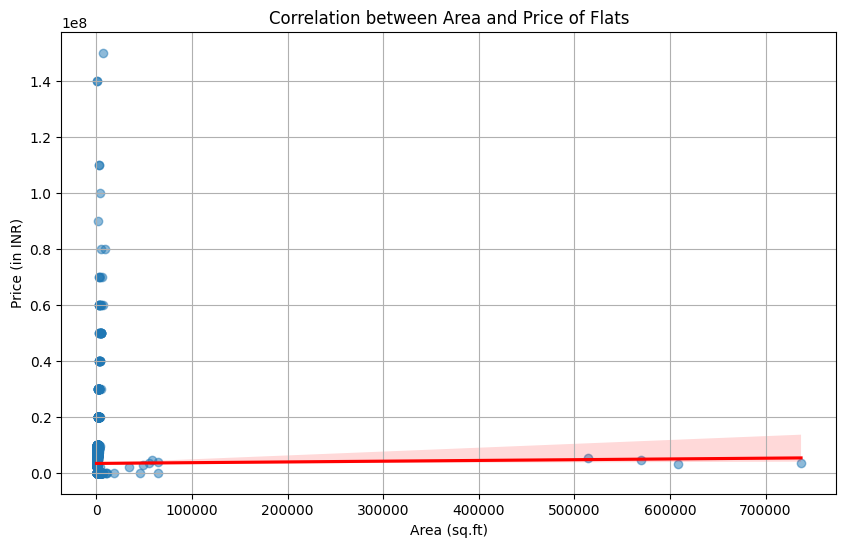

In [11]:
# Calculate correlation between area and price
correlation = df['areaWithType'].corr(df['price'])
print(correlation)

# Create a scatter plot with a trend line
plt.figure(figsize=(10, 6))
sns.regplot(x='areaWithType', y='price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Area (sq.ft)')
plt.ylabel('Price (in INR)')
plt.title('Correlation between Area and Price of Flats')
plt.grid(True)
plt.show()

**Question 7: Create a histogram to visualize the distribution of flat prices?**

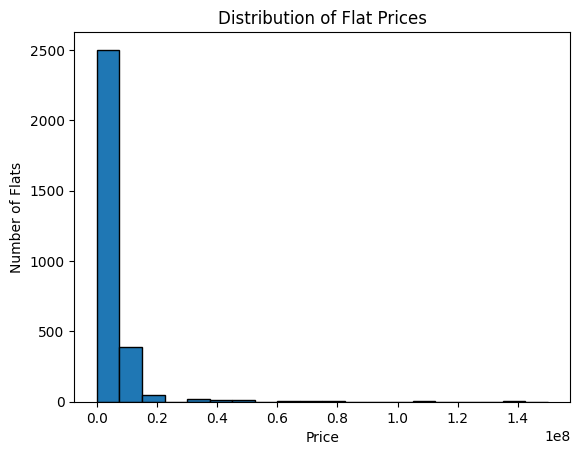

In [12]:
# Histogram of flat prices
plt.hist(df['price'], bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Number of Flats')
plt.title('Distribution of Flat Prices')
plt.show()

In [13]:
df1 = pd.read_csv('/kaggle/input/real-estate-data-sourced-from-99acres-com/houses.csv')
df1.head(5)

,property_name,link,society,price,rate,area,areaWithType,bedRoom,bathroom,balcony,...,address,noOfFloor,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
0,5 Bedroom House for sale in Sector 70A Gurgaon,https://www.99acres.com/5-bhk-bedroom-independ...,Bptp Visionnaire,5.25 Crore,"₹ 20,115/sq.ft.",(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5 Bedrooms,4 Bathrooms,3+ Balconies,...,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3 Floors,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5...",K70037724
1,5 Bedroom House for sale in Sector 21A Faridabad,https://www.99acres.com/5-bhk-bedroom-independ...,NaN,5.7 Crore,"₹ 105,751/sq.ft.",(50 sq.m.) Plot Area,Plot area 539(50.07 sq.m.),5 Bedrooms,4 Bathrooms,2 Balconies,...,"Sector 21A Faridabad, Gurgaon, Haryana",2 Floors,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN,E69288322
2,10 Bedroom House for sale in Sushant Lok Phase 1,https://www.99acres.com/10-bhk-bedroom-indepen...,NaN,2.1 Crore,"₹ 38,251/sq.ft.",(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10 Bedrooms,10 Bathrooms,3+ Balconies,...,"Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5...",F69536898
3,21 Bedroom House for sale in Sector 54 Gurgaon,https://www.99acres.com/21-bhk-bedroom-indepen...,NaN,5 Crore,"₹ 43,066/sq.ft.",(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21 Bedrooms,21 Bathrooms,3+ Balconies,...,"Sector 54 Gurgaon, Gurgaon, Haryana",5 Floors,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5...",R69483164
4,12 Bedroom House for sale in Sushant Lok Phase 1,https://www.99acres.com/12-bhk-bedroom-indepen...,NaN,3 Crore,"₹ 53,763/sq.ft.",(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),12 Bedrooms,12 Bathrooms,3+ Balconies,...,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5...",M69381272


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_name    1044 non-null   object
 1   link             1044 non-null   object
 2   society          453 non-null    object
 3   price            968 non-null    object
 4   rate             1005 non-null   object
 5   area             1044 non-null   object
 6   areaWithType     987 non-null    object
 7   bedRoom          987 non-null    object
 8   bathroom         987 non-null    object
 9   balcony          987 non-null    object
 10  additionalRoom   589 non-null    object
 11  address          1031 non-null   object
 12  noOfFloor        967 non-null    object
 13  facing           674 non-null    object
 14  agePossession    987 non-null    object
 15  nearbyLocations  913 non-null    object
 16  description      1036 non-null   object
 17  furnishDetails   743 non-null    

**Converting all required data type of price, no of floor, bedroom and area column to numeric.**

In [15]:
# Convert all values in the 'price' column to strings
df1['price'] = df1['price'].astype(str)

# Replace "Price on Request" with 0
df1.loc[df1['price'] == 'Price on Request', 'price'] = '0'

# Remove non-numeric characters and convert prices to numeric
df1['price'] = df1['price'].replace({' Lac': '00000', ' Crore': '0000000', 'â‚¹ ': '', ',': ''}, regex=True).astype(float)

# Convert the 'area' column to numeric values
df1['area'] = df1['area'].str.extract('(\d+\.?\d*)').astype(float)

# Extract the numeric part of the floors
df1['noOfFloor'] = df1['noOfFloor'].str.extract(r'(\d+)').astype(float)

# Convert all values in the 'bedRoom' column to strings and handle NaN values
df1['bedRoom'] = df1['bedRoom'].astype(str).str.extract('(\d+)').fillna(0).astype(int)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_name    1044 non-null   object 
 1   link             1044 non-null   object 
 2   society          453 non-null    object 
 3   price            968 non-null    float64
 4   rate             1005 non-null   object 
 5   area             1044 non-null   float64
 6   areaWithType     987 non-null    object 
 7   bedRoom          1044 non-null   int64  
 8   bathroom         987 non-null    object 
 9   balcony          987 non-null    object 
 10  additionalRoom   589 non-null    object 
 11  address          1031 non-null   object 
 12  noOfFloor        967 non-null    float64
 13  facing           674 non-null    object 
 14  agePossession    987 non-null    object 
 15  nearbyLocations  913 non-null    object 
 16  description      1036 non-null   object 
 17  furnishDetails

In [17]:
df1.isnull().sum()

property_name        0
link                 0
society            591
price               76
rate                39
area                 0
areaWithType        57
bedRoom              0
bathroom            57
balcony             57
additionalRoom     455
address             13
noOfFloor           77
facing             370
agePossession       57
nearbyLocations    131
description          8
furnishDetails     301
features           370
rating             137
property_id          8
dtype: int64

In [18]:
# Drop rows from furnish Details.

df1 = df1.dropna(subset=['furnishDetails'])

**Question 8: What is the most common number of floors in the listed houses?**

In [19]:
# 1. Most common number of floors
most_common_floors = df1['noOfFloor'].mode().iloc[0]
print(f"The most common number of floors is: {most_common_floors}")

The most common number of floors is: 3.0


**Question 9: Calculate the average price of houses with more than 3 bedrooms.**

In [20]:
# Filter houses with more than 3 bedrooms
filtered_bd = df1[df1['bedRoom'] > 3]

# Calculate the average price
average_price = filtered_bd['price'].mean()

print(f"The average price of houses with more than 3 bedrooms is: ₹ {average_price:.2f}")

The average price of houses with more than 3 bedrooms is: ₹ 23760447.77


**Question 10: Compare the average areas of furnished vs. unfurnished houses.**

Average area of furnished houses: 281.0746951219512
Average area of unfurnished houses: 183.98850574712642


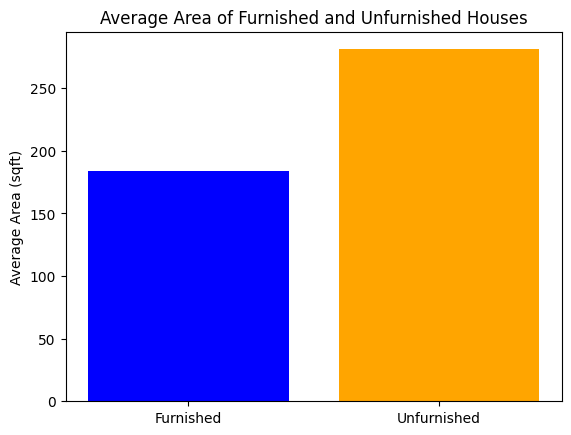

In [21]:
# Filter furnished and unfurnished houses
furnished_avg_area = df1[df1['furnishDetails'].str.contains('No', case=False)]['area'].mean()
unfurnished_avg_area = df1[~df1['furnishDetails'].str.contains('No', case=False)]['area'].mean()

print("Average area of furnished houses:", furnished_avg_area)
print("Average area of unfurnished houses:", unfurnished_avg_area)

# Visualization
labels = ['Furnished', 'Unfurnished']
avg_areas = [unfurnished_avg_area, furnished_avg_area]

fig, ax = plt.subplots()
ax.bar(labels, avg_areas, color=['blue', 'orange'])

ax.set_ylabel('Average Area (sqft)')
ax.set_title('Average Area of Furnished and Unfurnished Houses')
plt.show()